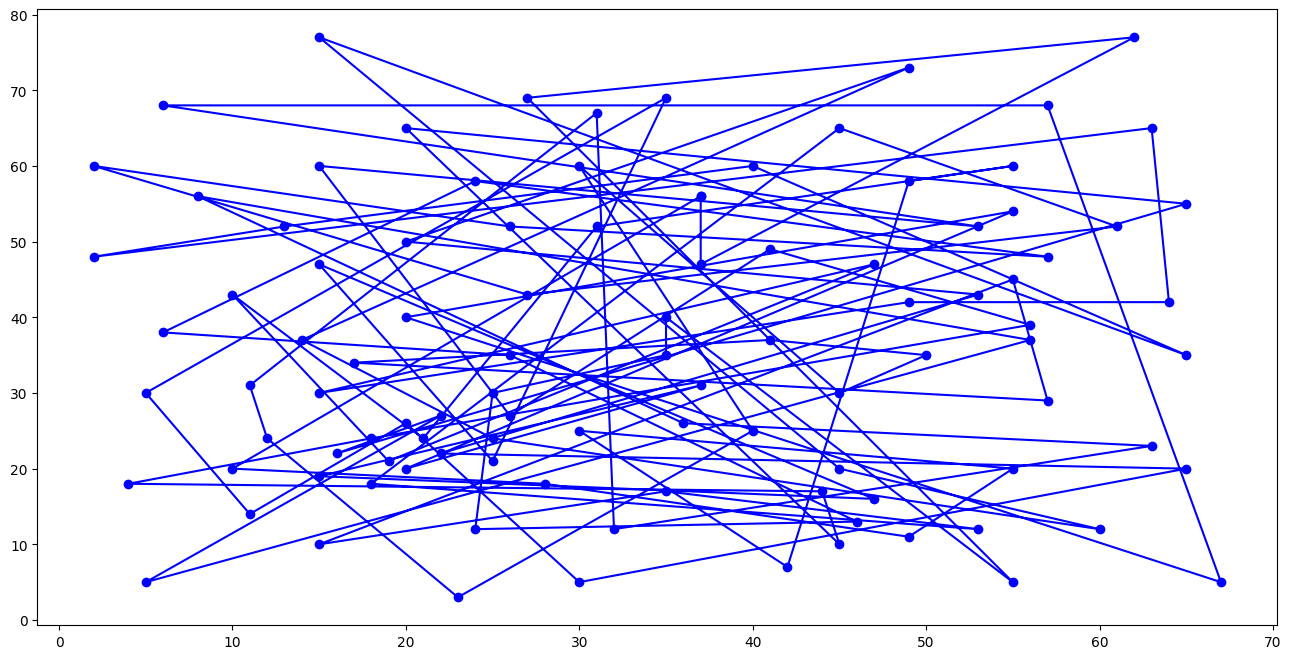

3286.2603875205923


In [1]:
%matplotlib inline
import random, numpy, math, copy, matplotlib.pyplot as plt
import numpy as np

class City:
    """class for the coordinates of a location """
    def __init__(self, coords):
        self.x = int(coords[0])
        self.y = int(coords[1])
    
    def distance(self, city):
        """
        Euclidean distance between two locations
        """
        xDis = self.x - city.x
        yDis = self.y - city.y
        distance = np.sqrt((xDis ** 2) + (yDis ** 2))
        return distance
    
    def __repr__(self):
        return "(" + str(self.x) + "," + str(self.y) + ")"
    
    #def getCoord(self):
    #    return [self.x, self.y]

class TSP:
    def __init__(self, filename = None, cities_no = 10):
        """
         random generation of location coordinates / reading data from a .tsp file 
        """
        if filename is None:
            self.N = cities_no
            self.cities = [City(random.sample(range(100), 2)) for i in range(self.N)];
        else:
            self.N, self.cities = self.___read_TSP_file(filename)
        
    def ___read_TSP_file(self, filename):
        nodelist = []

        # Open input file
        with open(filename, 'r') as infile:

            # Read instance header
            Name = infile.readline().strip().split()[1] # NAME
            FileType = infile.readline().strip().split()[1] # TYPE
            Comment = infile.readline().strip().split()[1] # COMMENT
            Dimension = infile.readline().strip().split(":")[1] # DIMENSION
            EdgeWeightType = infile.readline().strip().split()[1] # EDGE_WEIGHT_TYPE
            infile.readline()

            # Read node list
            N = int(Dimension)
            for i in range(N):
                coords = infile.readline().strip().split()[1:]
                nodelist.append(City(coords))

        return N, nodelist
    
    def eval(self, tour):
        """computation of a tour cost"""
        val = 0
        for i in range(self.N-1):
            val += self.cities[tour[i]].distance(self.cities[tour[i+1]])
        val += self.cities[tour[0]].distance(self.cities[tour[self.N-1]])
        return val
    
    def displayTour(self, tour):
        """plot the tour"""
        
        plt.figure(figsize = (16,8))

        plt.axes()
        plt.plot([self.cities[tour[i % self.N]].x for i in range(self.N+1)], [self.cities[tour[i % self.N]].y for i in range(self.N+1)], 'bo-')
        plt.show()
    
    def init_solution(self):
        """initial solution - random perturbation"""
        return random.sample(range(self.N), self.N)

    def perturb_solution(self, S):
        """2-opt perturbation"""
        i, j = random.sample(range(self.N),2)
        if i > j: i,j=j,i
        new_S = S.copy()
        for k in range((j-i)//2):
            new_S[i+k],new_S[j-k]=new_S[j-k],new_S[i+k]
        return new_S
    
# prob = TSP("eil51.tsp")
prob = TSP("../data/tsp/eil101.tsp")

tour = random.sample(range(prob.N),prob.N); # random initial tour
prob.displayTour(tour)
print(prob.eval(tour))

3427.999372794424 999.00025
3416.515314260931 998.0014995000627
3403.6270855843936 997.0037475009376
3370.143302169311 996.5052456271872
3325.5872724156443 996.0069930043736
3316.4596361578506 994.5137293956111
3312.646363869967 993.0227045625006
3309.993221531427 922.6363291489996
3282.7717218836638 922.1750109844252
3270.680497669546 919.8718777420612
3257.8315813090876 896.2576207922809
3257.4964471564053 878.506136835266
3253.1951334324544 878.0668837668485
3235.466255863876 736.3302692509762
3215.0724517906942 690.3250841534149
3212.4670561745834 689.9799216113382
3184.340805185926 689.2901141847074
3182.1129100269377 688.9454691276151
3161.9821925627875 688.2566958948548
3127.3432961722083 687.568611263134
3081.2736014726775 636.6005420619998
3047.497994673228 636.2822417909689
3026.127173304378 513.4171118982699
3021.5608653394543 513.1604033423208
3018.7162964732124 507.7990749071138
2962.58867081373 504.50826487103353
2961.0108519790388 503.75188079186216
2931.6673477832314 50

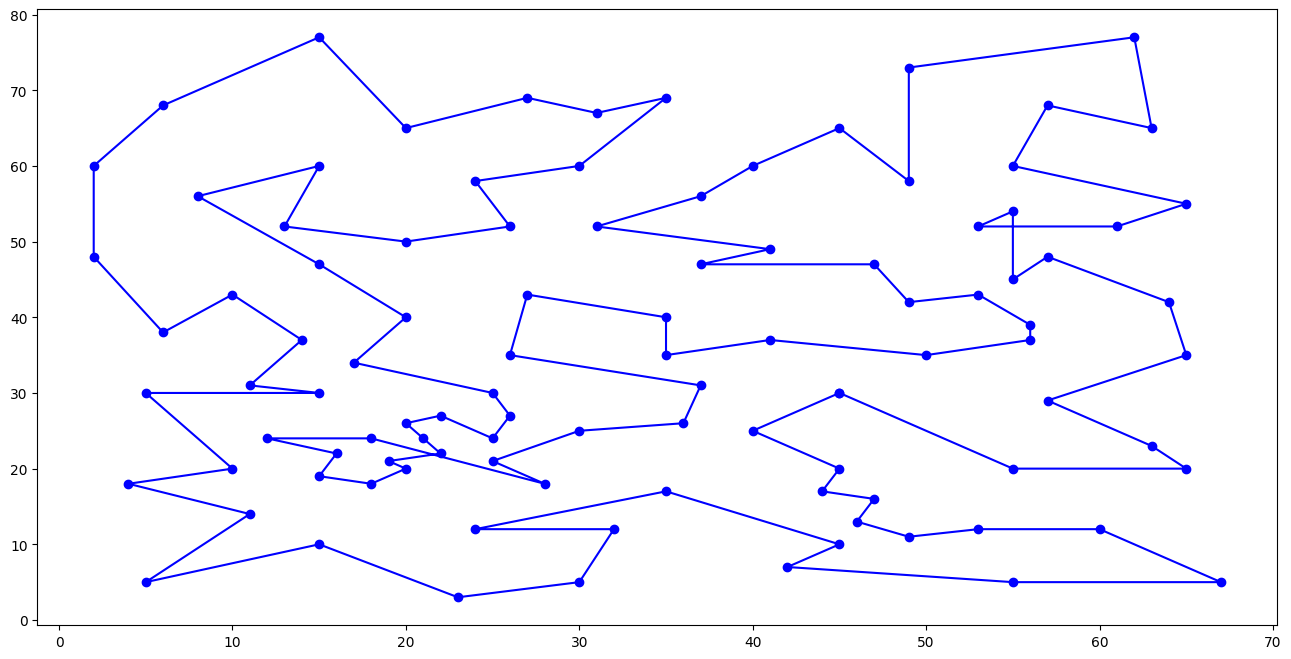

best 736.7524382917425


In [2]:
import random
import math

# acceptance probability
def accept(current_cost, new_cost, T):
    if new_cost <= current_cost:
        return True 
    if random.random() < np.exp(-(new_cost-current_cost)/T) : 
        return True
    else: 
        return False
    
# cooling schedule
def updateTemperature(T, k):
    return  T*0.9995
    #return T/k

# Simulated Annealing algorithm    
def SA(prob, T_Max, T_Min):
    S = prob.init_solution()
    S_cost = prob.eval(S)
    
    #prob.displayTour(S)
    
    S_best = S
    S_best_cost = S_cost
    
    T = T_Max
    k=0
    while T > T_Min:
        k=k+1
        S_prim = prob.perturb_solution(S)
        S_prim_cost = prob.eval(S_prim)
        
        if accept(S_cost, S_prim_cost, T):
            S = S_prim.copy()
            S_cost = S_prim_cost
        if S_cost < S_best_cost:
            S_best = S.copy()
            S_best_cost = S_cost
            print(S_best_cost, T)
            
        T = updateTemperature(T,k)
    
    return S_best_cost, S

best, S = SA(prob, 1000., 0.000001)
prob.displayTour(S)
print("best", best)